# **LOGISTIC REGRESSION**

## **1. Data Exploration:**

### a. Load the dataset and perform exploratory data analysis (EDA).

In [2]:
import numpy as np
import pandas as pd

df_test = pd.read_csv('/content/Titanic_test.csv')
df_train = pd.read_csv('/content/Titanic_train.csv')

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df_train['Cabin'].isnull().sum() #In df_train, Cabin has 687 null values out of 891, which is approximately 77%.

687

In [6]:
df_test['Cabin'].isnull().sum() #In df_test, Cabin has 327 null values out of 418, which is approximately 78%.

327

### b. Examine the features, their types, and summary statistics.

In [7]:
import pandas as pd

# Columns to drop
columns_to_drop = ['Name', 'Ticket','Cabin']

# Drop the unwanted columns from df_train
df_train = df_train.drop(columns=columns_to_drop)

# Drop the unwanted columns from df_test
df_test = df_test.drop(columns=columns_to_drop)

# Display the resulting DataFrames
print("df_train after dropping columns:")
print(df_train)

print("\ndf_test after dropping columns:")
print(df_test)


df_train after dropping columns:
     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3     

In [8]:
# Print data types of columns in the training dataset
print("Training Dataset:")
print(df_train.dtypes)

# Print data types of columns in the testing dataset
print("\nTesting Dataset:")
print(df_test.dtypes)

Training Dataset:
PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

Testing Dataset:
PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object


In [9]:
# Print summary statistics for the training dataset
print("Training Dataset Summary Statistics:")
print(df_train.describe())

# Print summary statistics for the testing dataset
print("\nTesting Dataset Summary Statistics:")
print(df_test.describe())


Training Dataset Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Testing Dataset Summary Statistics:
       

### c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features. Analyze any patterns or correlations observed in the data.

In [10]:
# Select categorical columns
categorical_columns_1 = df_train.select_dtypes(include=['object']).columns

# Loop through each categorical column and print frequency counts of each category
for column in categorical_columns_1:
    print("Frequency counts for column:", column)
    print(df_train[column].value_counts())
    print()  # Empty line for separation

Frequency counts for column: Sex
Sex
male      577
female    314
Name: count, dtype: int64

Frequency counts for column: Embarked
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



In [11]:
# Select categorical columns
categorical_columns_2 = df_test.select_dtypes(include=['object']).columns

# Loop through each categorical column and print frequency counts of each category
for column in categorical_columns_2:
    print("Frequency counts for column:", column)
    print(df_test[column].value_counts())
    print()  # Empty line for separation

Frequency counts for column: Sex
Sex
male      266
female    152
Name: count, dtype: int64

Frequency counts for column: Embarked
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64



In [12]:
# Get numerical columns for the training dataset
num_col_1 = df_train.select_dtypes(include=['int64', 'float64'])

# Get numerical columns for the testing dataset
num_col_2 = df_test.select_dtypes(include=['int64', 'float64'])


In [13]:
num_col_1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


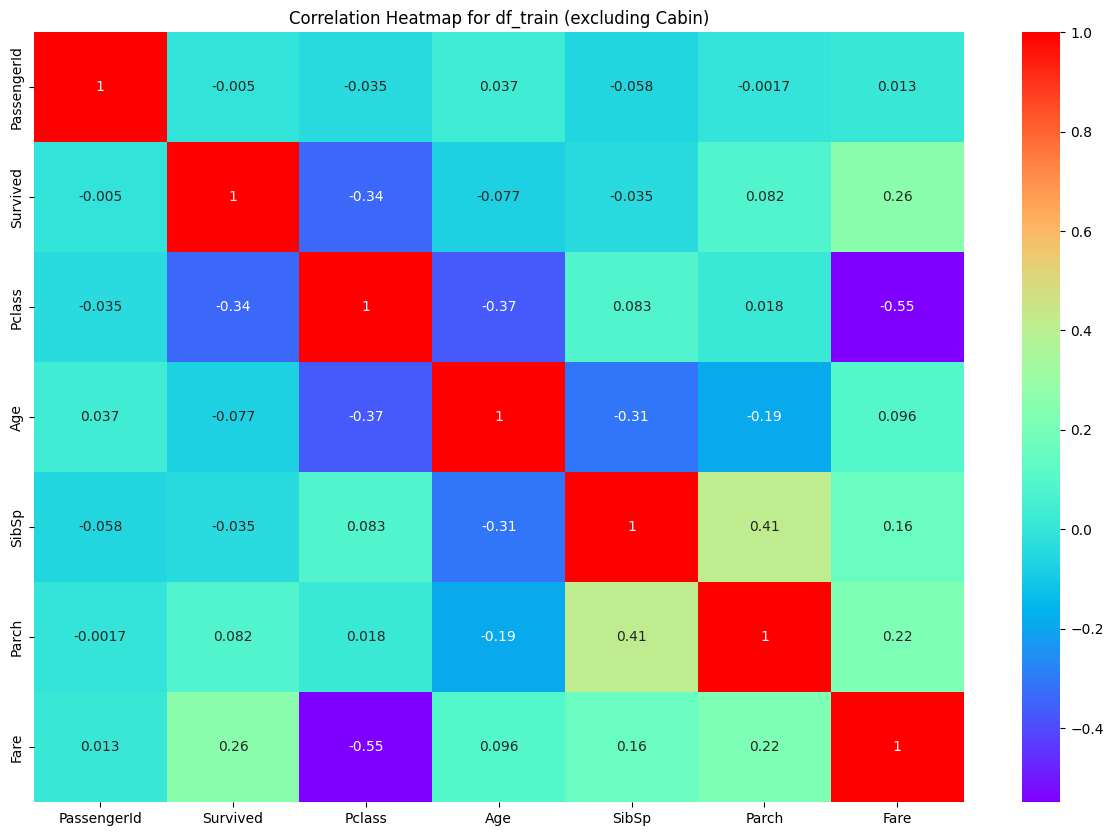

In [14]:
#Train Heatamap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(num_col_1.corr(), annot=True, cmap='rainbow')
plt.title('Correlation Heatmap for df_train (excluding Cabin)')
plt.show()


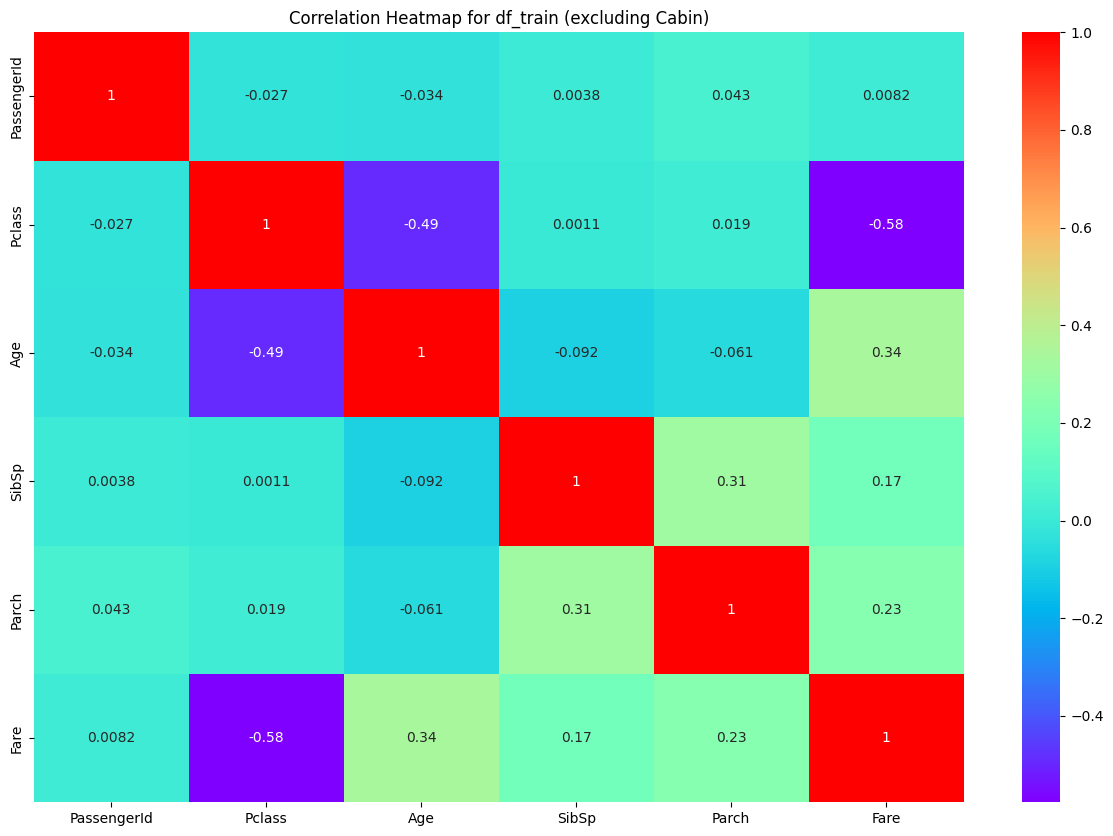

In [15]:
#Test Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(num_col_2.corr(), annot=True, cmap='rainbow')
plt.title('Correlation Heatmap for df_train (excluding Cabin)')
plt.show()

<Axes: >

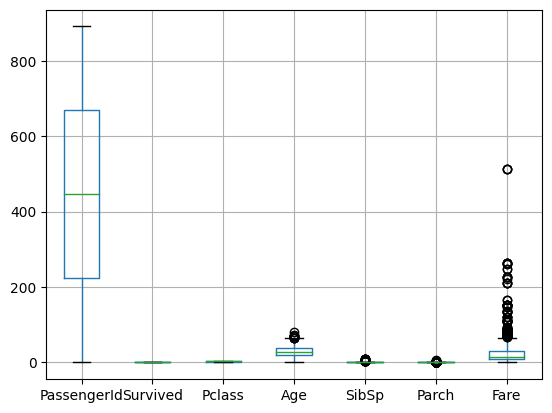

In [16]:
# Boxplot for Training Dataset
num_col_1.boxplot()

<Axes: >

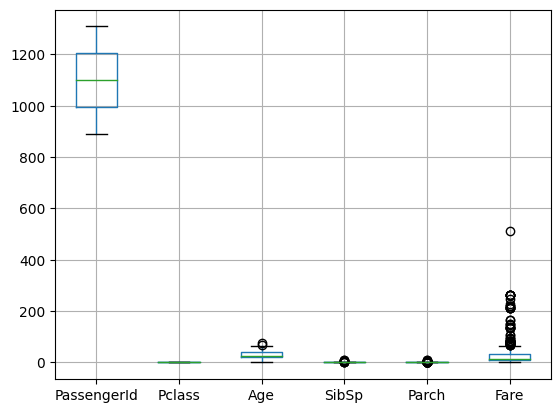

In [17]:
# Boxplot for Testing Dataset
num_col_2.boxplot()

## **2. Data Preprocessing**

### a. Handle missing values (e.g., imputation).

In [18]:
# Treating Missing Values

import pandas as pd
import numpy as np

# Function to detect outliers using IQR
def has_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# Function to treat missing values based on presence of outliers
def treat_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            # Categorical column: replace missing values with mode
            df[col].fillna(df[col].mode()[0], inplace=True)
        elif df[col].isnull().sum() > 0:  # Check for missing values in numerical columns
            if has_outliers_iqr(df[col]).any():
                # Outliers present: replace missing values with median
                df[col].fillna(df[col].median(), inplace=True)
            else:
                # No outliers: replace missing values with mean
                df[col].fillna(df[col].mean(), inplace=True)
    return df

In [19]:
# Apply treatment to df_train
df_train = treat_missing_values(df_train)

# Display the treated DataFrame
print(df_train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [20]:
# Apply treatment to df_test
df_test = treat_missing_values(df_test)

# Display the treated DataFrame
print(df_test.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [21]:
print("Data Types of Train Dataset : \n",df_train.dtypes)
print("\nData Types of Test Dataset : \n",df_test.dtypes)

Data Types of Train Dataset : 
 PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

Data Types of Test Dataset : 
 PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object


### b. Encode categorical variables.

In [22]:
import pandas as pd

# Columns to encode
categorical_cols = ['Sex', 'Embarked']

# Function to encode categorical columns using one-hot encoding
def encode_categorical_columns(df, categorical_cols):
    encoded_df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
    # Convert only the dummy columns to integers (0 and 1)
    for col in encoded_df.columns:
        if col.startswith(tuple(categorical_cols)):
            encoded_df[col] = encoded_df[col].astype(int)
    return encoded_df

In [23]:
# Apply the encoding to both df_train and df_test
df_train_encoded = encode_categorical_columns(df_train, categorical_cols)
df_test_encoded = encode_categorical_columns(df_test, categorical_cols)

# Display the encoded DataFrames
print("Encoded df_train:")
print(df_train_encoded.head())

print("\nEncoded df_test:")
print(df_test_encoded.head())

Encoded df_train:
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0            1         0       3  22.0      1      0   7.2500           0   
1            2         1       1  38.0      1      0  71.2833           1   
2            3         1       3  26.0      0      0   7.9250           1   
3            4         1       1  35.0      1      0  53.1000           1   
4            5         0       3  35.0      0      0   8.0500           0   

   Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0         1           0           0           1  
1         0           1           0           0  
2         0           0           0           1  
3         0           0           0           1  
4         1           0           0           1  

Encoded df_test:
   PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0          892       3  34.5      0      0   7.8292           0         1   
1          893       3  47.0      1      0   7.

## **3. Train the model using the training data.**

In [24]:
# Separate features (X) and target variable (y)
X_train = df_train_encoded.drop('Survived', axis=1)
y_train = df_train_encoded['Survived']

In [25]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the model using the training data
logistic_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# Make predictions on the entire training set (X_train) for final evaluation
y_pred = logistic_model.predict(X_train)
y_pred_df = pd.DataFrame({'Y': y_train, 'Yhat': y_pred})
print(y_pred_df)

     Y  Yhat
0    0     0
1    1     1
2    1     1
3    1     1
4    0     0
..  ..   ...
886  0     0
887  1     1
888  0     1
889  1     1
890  0     0

[891 rows x 2 columns]


In [27]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for the model accuracy
conf_matrix = confusion_matrix(y_train, y_pred)
print(conf_matrix)

[[473  76]
 [102 240]]


In [28]:
# Make predictions on the test set
test_predictions = logistic_model.predict(df_test_encoded)
test_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
# Given confusion matrix values
TP = 473
TN = 240
FP = 73
FN = 102

# Calculating accuracy
accuracy = (TP + TN) / (TP + FP + FN + TN)
accuracy_percent = round(accuracy * 100)
print(f'Accuracy (manual calculation): {accuracy_percent} %')

Accuracy (manual calculation): 80 %


In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred)
accuracy = round(accuracy * 100)
print(f'Accuracy : {accuracy} %')

Accuracy : 80 %


## **4. Model Evaluation**

### a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score. Visualize the ROC curve.

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# Evaluate the model on the training data
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

Accuracy: 0.8002
Precision: 0.7595
Recall: 0.7018
F1-score: 0.7295
ROC-AUC Score: 0.7817


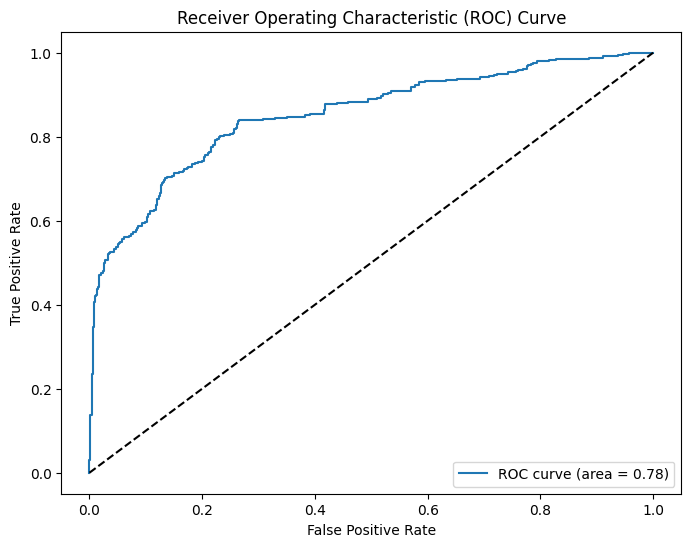

In [32]:
# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, logistic_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # x axis range is 0 to 1, y axis range is 0 to 1, k-- is a line type - dotted
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [33]:
# Make predictions on the test set
test_predictions = logistic_model.predict(df_test_encoded)
print(test_predictions)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


## **5. Interpretation**

### a. Interpret the coefficients of the logistic regression model.

In [34]:
# Get the coefficients
coefficients = logistic_model.coef_[0]

# Get the names of the predictor variables
predictor_names = X_train.columns

# Print the coefficients along with predictor names
for i in range(len(coefficients)):
    print(f'{predictor_names[i]}: {coefficients[i]:.4f}')

PassengerId: 0.0003
Pclass: -0.8600
Age: -0.0250
SibSp: -0.1064
Parch: -0.1717
Fare: 0.0039
Sex_female: 1.9871
Sex_male: -0.7495
Embarked_C: 0.7142
Embarked_Q: 0.0959
Embarked_S: 0.4275


### **Interpretation**

**1) PassengerId: 0.0003**

This coefficient is very close to zero, indicating that the passenger ID does not significantly affect the survival probability. This makes sense as PassengerId is merely an identifier and should not impact survival chances.

**2) Pclass: -0.8600**

A negative coefficient indicates that as the class increases (from 1 to 3), the probability of survival decreases. Passengers in higher classes (lower numeric value) had a higher chance of survival, which aligns with historical accounts of the Titanic disaster.

**3) Age: -0.0250**

This small negative coefficient suggests that older passengers had a slightly lower probability of survival. While age did have some impact, it was not a dominant factor compared to others.

**4) SibSp: -0.1064**

The negative coefficient indicates that having more siblings/spouses aboard slightly decreased the survival probability. This might be because larger groups could have had more difficulty finding lifeboats together.

**5) Parch: -0.1717**

Similarly, having more parents/children aboard also slightly decreased the probability of survival, possibly due to similar reasons as SibSp.

**6)Fare: 0.0039**

A positive but very small coefficient for Fare suggests that passengers who paid higher fares had a slightly higher chance of survival, which might correlate with being in a higher class.

**7) Sex_female: 1.9871**

A large positive coefficient indicates that being female significantly increased the probability of survival. This aligns with the "women and children first" policy that was followed during the evacuation.

**8) Sex_male: -0.7495**

A significant negative coefficient indicates that being male decreased the probability of survival, which further supports the survival policy of prioritizing women and children.

**9) Embarked_C: 0.7142**

A positive coefficient indicates that passengers who embarked at Cherbourg had a higher probability of survival compared to the reference category.

**10) Embarked_Q: 0.0959**

A small positive coefficient indicates a slightly higher chance of survival for passengers who embarked at Queenstown compared to the reference category.

**11) Embarked_S: 0.4275**

A positive coefficient indicates a higher probability of survival for passengers who embarked at Southampton compared to the reference category.

##**6. Deployment with Streamlit**

In [36]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00


In [39]:

import joblib

# Assuming `logistic_model` is your trained model
joblib.dump(logistic_model, 'logistic_model.pkl')

from google.colab import files

# Download the logistic_model.pkl file
files.download('logistic_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('/content/logistic_model.pkl')

# Title
st.title("Titanic Survival Prediction App")

# Sidebar for user input parameters
st.sidebar.header('User Input Features')

def user_input_features():
    PassengerId = st.sidebar.number_input('PassengerId', min_value=1, max_value=100000, value=1)
    Pclass = st.sidebar.selectbox('Pclass', (1, 2, 3))
    Age = st.sidebar.slider('Age', 0, 100, 25)
    SibSp = st.sidebar.slider('SibSp', 0, 10, 0)
    Parch = st.sidebar.slider('Parch', 0, 10, 0)
    Fare = st.sidebar.slider('Fare', 0.0, 500.0, 50.0)
    Sex = st.sidebar.selectbox('Sex', ('male', 'female'))
    Embarked = st.sidebar.selectbox('Embarked', ('C', 'Q', 'S'))

    data = {
        'PassengerId': PassengerId,
        'Pclass': Pclass,
        'Age': Age,
        'SibSp': SibSp,
        'Parch': Parch,
        'Fare': Fare,
        'Sex': Sex,
        'Embarked': Embarked
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

# Encode categorical variables
def encode_categorical(df):
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=False)
    return df

input_df = encode_categorical(input_df)

# Ensure all columns are present
required_columns = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female','Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
for col in required_columns:
    if col not in input_df.columns:
        input_df[col] = 0

input_df = input_df[required_columns]

# Display user input
st.subheader('User Input Features')
st.write(input_df)

# Prediction
prediction = model.predict(input_df)
prediction_proba = model.predict_proba(input_df)

# Display prediction
st.subheader('Prediction')
survived = 'Survived' if prediction[0] == 1 else 'Not Survived'
st.write(survived)

# Display prediction probability
st.subheader('Prediction Probability')
st.write(prediction_proba)


## **Interview Questions**

### **1. What is the difference between precision and recall?**




**Precision is the measure of the accuracy of the positive predictions made by a model; it is the ratio of true positive predictions to the total number of positive predictions (true positives + false positives). Recall, on the other hand, measures the model's ability to correctly identify all relevant instances; it is the ratio of true positive predictions to the total number of actual positives (true positives + false negatives).**

### **2. What is cross-validation, and why is it important in binary classification?**




**Cross-validation is a technique used to assess the performance of a model by splitting the data into multiple subsets, training the model on some subsets, and validating it on the remaining ones. This process is repeated several times with different splits. It is important in binary classification because it provides a more reliable estimate of the model's performance, helps prevent overfitting, and ensures that the model generalizes well to unseen data.**